MemTotal:       13289424 kB
MemFree:         6346196 kB
MemAvailable:   10234568 kB
Buffers:           99040 kB
Cached:          3972984 kB
SwapCached:            0 kB
Active:           785140 kB
Inactive:        5775764 kB
Active(anon):       1368 kB
Inactive(anon):  2489456 kB
Active(file):     783772 kB
Inactive(file):  3286308 kB
Unevictable:          24 kB
Mlocked:              24 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              8200 kB
Writeback:             0 kB
AnonPages:       2488956 kB
Mapped:           949448 kB
Python version: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
Torch version: 2.6.0+cu124
=== AST SES SINIFLANDIRMA EĞİTİMİ ===
Google Drive'dan veri yükleniyor...
Mounted at /content/drive
Google Drive başarıyla bağlandı!
Drive'da veri bulundu: /content/drive/MyDrive/MakineOgrenmesiProjesi/Egitim_Verileri
Veri kopyalandı!
data klasörü var mı? True
Alt klasörler: ['bronşit', 'normal', 'astim', 'zatüre', 'krup']
bronşit : ['nLI9sM

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ASTForAudioClassification were not initialized from the model checkpoint at MIT/ast-finetuned-audioset-10-10-0.4593 and are newly initialized because the shapes did not match:
- classifier.dense.bias: found shape torch.Size([527]) in the checkpoint and torch.Size([5]) in the model instantiated
- classifier.dense.weight: found shape torch.Size([527, 768]) in the checkpoint and torch.Size([5, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Kullanılan cihaz: cuda
Veri yükleniyor...
Toplam veri sayısı: 250
Toplam 250 örnek yüklendi
  astim: 50 örnek
  bronşit: 50 örnek
  krup: 50 örnek
  normal: 50 örnek
  zatüre: 50 örnek
Train: 175, Val: 37, Test: 38

Model oluşturuluyor...
Toplam parametre sayısı: 86,192,645
Eğitilebilir parametre sayısı: 86,192,645


Epoch 1/5 - Training:   0%|          | 0/88 [00:00<?, ?it/s]

Epoch 1/5 - Validation:   0%|          | 0/19 [00:00<?, ?it/s]

Epoch 1/5: Train Loss: 0.9438, Train Acc: 67.43%, Val Loss: 0.7243, Val Acc: 72.97%
  Yeni en iyi model kaydedildi! (Val Acc: 72.97%)


Epoch 2/5 - Training:   0%|          | 0/88 [00:00<?, ?it/s]

Epoch 2/5 - Validation:   0%|          | 0/19 [00:00<?, ?it/s]

Epoch 2/5: Train Loss: 0.5458, Train Acc: 82.86%, Val Loss: 0.4227, Val Acc: 86.49%
  Yeni en iyi model kaydedildi! (Val Acc: 86.49%)


Epoch 3/5 - Training:   0%|          | 0/88 [00:00<?, ?it/s]

Epoch 3/5 - Validation:   0%|          | 0/19 [00:00<?, ?it/s]

Epoch 3/5: Train Loss: 0.4611, Train Acc: 84.00%, Val Loss: 0.6945, Val Acc: 72.97%


Epoch 4/5 - Training:   0%|          | 0/88 [00:00<?, ?it/s]

Epoch 4/5 - Validation:   0%|          | 0/19 [00:00<?, ?it/s]

Epoch 4/5: Train Loss: 0.4992, Train Acc: 84.57%, Val Loss: 0.5146, Val Acc: 81.08%


Epoch 5/5 - Training:   0%|          | 0/88 [00:00<?, ?it/s]

Epoch 5/5 - Validation:   0%|          | 0/19 [00:00<?, ?it/s]

Epoch 5/5: Train Loss: 0.2849, Train Acc: 89.14%, Val Loss: 0.4085, Val Acc: 86.49%

Eğitim süresi: 5.11 dakika

--- Eğitim Sonu Metrikleri ---
Son Train Accuracy: 89.1429
Son Validation Accuracy: 86.4865
Son Train Loss: 0.2849
Son Validation Loss: 0.4085

En iyi model yükleniyor ve test ediliyor...


Testing:   0%|          | 0/19 [00:00<?, ?it/s]


Sınıflandırma Raporu:
              precision    recall  f1-score   support

       astim     0.8889    1.0000    0.9412         8
    bronşit     0.7778    1.0000    0.8750         7
        krup     1.0000    0.8750    0.9333         8
      normal     1.0000    0.7500    0.8571         8
     zatüre     1.0000    1.0000    1.0000         7

    accuracy                         0.9211        38
   macro avg     0.9333    0.9250    0.9213        38
weighted avg     0.9357    0.9211    0.9205        38

Accuracy: 0.9211
Precision: 0.9333
Recall (Sensitivity): 0.9250
Specificity: 0.9333
F1-Score: 0.9213
AUC: 0.9983
Test/Inference süresi: 4.78 saniye


TypeError: Object of type int64 is not JSON serializable

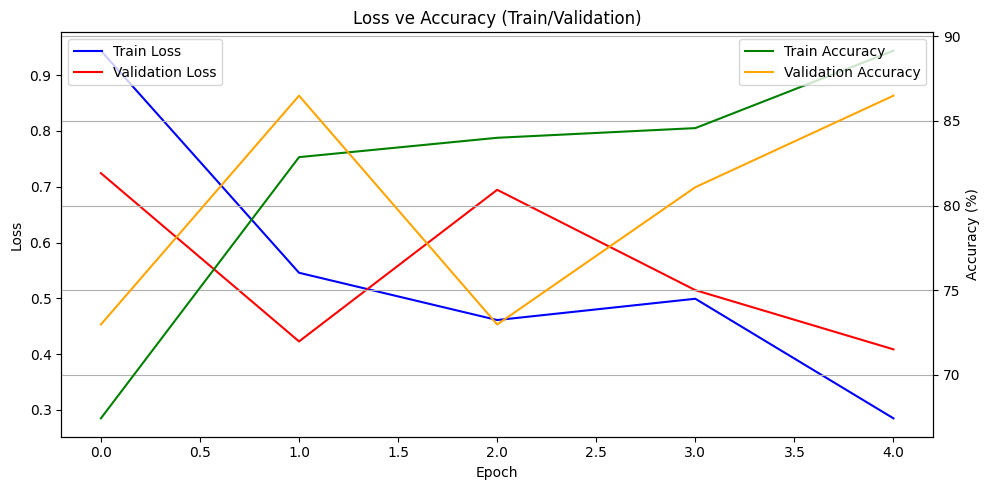

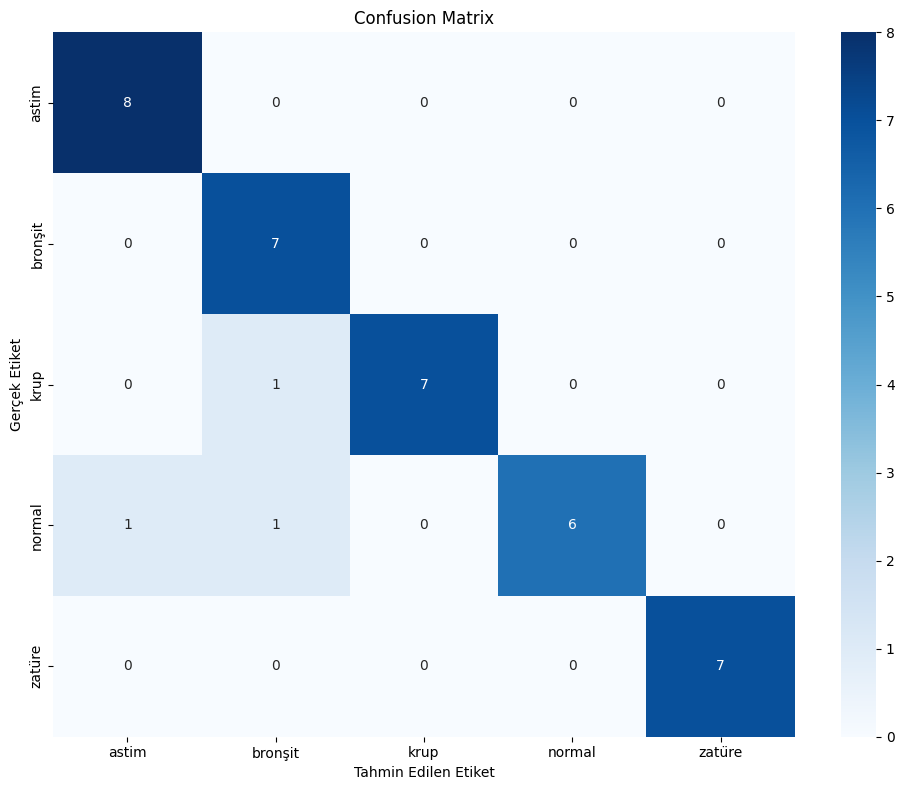

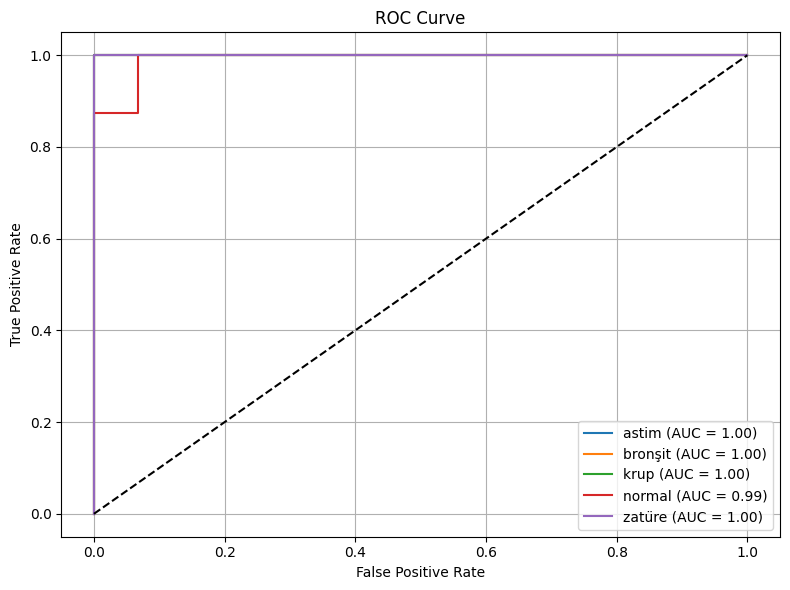

In [1]:
# =========================
# AST ile .wav Ses Sınıflandırma - Google Colab (RAM Dostu)
# =========================

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import ASTFeatureExtractor, ASTForAudioClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_fscore_support, accuracy_score
from sklearn.preprocessing import label_binarize
import torchaudio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from google.colab import drive, files
import time
import json
import sys
import gc

# RAM kullanımını göster
!cat /proc/meminfo | head -20

print("Python version:", sys.version)
print("Torch version:", torch.__version__)

# Uzun ses dosyalarını kısaltmak için örnek kod (isteğe bağlı):
# def truncate_wav(wav, sr, max_sec=5):
#     max_len = int(sr * max_sec)
#     if wav.shape[-1] > max_len:
#         wav = wav[..., :max_len]
#     return wav

# 2. Google Drive Bağlantısı
def mount_google_drive():
    try:
        drive.mount('/content/drive')
        print("Google Drive başarıyla bağlandı!")
        return True
    except Exception as e:
        print(f"Google Drive bağlantı hatası: {e}")
        return False

# 3. Veri Yükleme Fonksiyonları
def load_data(data_dir, class_names):
    data_paths = []
    labels = []
    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.exists(class_dir):
            for file_name in os.listdir(class_dir):
                if file_name.endswith('.wav'):
                    file_path = os.path.join(class_dir, file_name)
                    data_paths.append(file_path)
                    labels.append(class_idx)
    return data_paths, labels

# 4. Dataset Sınıfı
class AudioWavDataset(Dataset):
    def __init__(self, data_paths, labels):
        self.data_paths = data_paths
        self.labels = labels
    def __len__(self):
        return len(self.data_paths)
    def __getitem__(self, idx):
        wav, sr = torchaudio.load(self.data_paths[idx])
        wav = wav.mean(dim=0)  # mono
        # wav = truncate_wav(wav, sr, max_sec=5)  # Uzun sesleri kısaltmak için açabilirsin
        label = self.labels[idx]
        return wav, label

# 5. Collate Function (AST için)
def collate_fn(batch):
    wavs, labels = zip(*batch)
    wavs = [w.numpy() for w in wavs]
    inputs = feature_extractor(wavs, sampling_rate=16000, return_tensors="pt", padding=True)
    labels = torch.tensor(labels)
    return inputs, labels

# 6. Eğitim ve Değerlendirme Fonksiyonları
def train_model(model, train_loader, val_loader, num_epochs, device, learning_rate=5e-5, patience=5):
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    best_val_acc = 0.0
    patience_counter = 0
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    for epoch in range(num_epochs):
        model.train()
        train_loss, train_correct, train_total = 0.0, 0, 0
        for batch in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Training'):
            inputs, labels = batch
            inputs = {k: v.to(device) for k, v in inputs.items()}
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = model(**inputs, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            _, predicted = torch.max(outputs.logits.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
        train_acc = 100 * train_correct / train_total
        avg_train_loss = train_loss / len(train_loader)
        # Validation
        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0
        with torch.no_grad():
            for batch in tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Validation'):
                inputs, labels = batch
                inputs = {k: v.to(device) for k, v in inputs.items()}
                labels = labels.to(device)
                outputs = model(**inputs, labels=labels)
                loss = outputs.loss
                val_loss += loss.item()
                _, predicted = torch.max(outputs.logits.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        val_acc = 100 * val_correct / val_total
        avg_val_loss = val_loss / len(val_loader)
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)
        print(f'Epoch {epoch+1}/{num_epochs}: Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {avg_val_loss:.4f}, Val Acc: {val_acc:.2f}%')
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            patience_counter = 0
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'val_acc': val_acc,
                'class_names': class_names,
                'config': config
            }, 'best_ast_model.pth')
            print(f'  Yeni en iyi model kaydedildi! (Val Acc: {val_acc:.2f}%)')
        else:
            patience_counter += 1
        # Bellek temizliği
        gc.collect()
        torch.cuda.empty_cache()
        if patience_counter >= patience:
            print(f'Early stopping! {patience} epoch boyunca iyileşme olmadı.')
            break
    return train_losses, val_losses, train_accs, val_accs

def evaluate_model(model, test_loader, device, class_names, return_probs=False):
    model.eval()
    all_predictions, all_labels, all_probs = [], [], []
    with torch.no_grad():
        for batch in tqdm(test_loader, desc='Testing'):
            inputs, labels = batch
            inputs = {k: v.to(device) for k, v in inputs.items()}
            labels = labels.to(device)
            outputs = model(**inputs)
            probs = torch.softmax(outputs.logits, dim=1)
            _, predicted = torch.max(probs.data, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
    # Metrikler
    print("\nSınıflandırma Raporu:")
    print(classification_report(all_labels, all_predictions, target_names=class_names, digits=4))
    acc = accuracy_score(all_labels, all_predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_predictions, average='macro')
    cm = confusion_matrix(all_labels, all_predictions)
    sensitivity = recall  # Duyarlılık (Recall)
    specificity = np.mean([cm[i,i]/(cm[:,i].sum() if cm[:,i].sum()>0 else 1) for i in range(len(class_names))])
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1-Score: {f1:.4f}")
    # ROC ve AUC
    y_true_bin = label_binarize(all_labels, classes=list(range(len(class_names))))
    auc = roc_auc_score(y_true_bin, np.array(all_probs), average='macro', multi_class='ovr')
    print(f"AUC: {auc:.4f}")
    # Confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('Gerçek Etiket')
    plt.xlabel('Tahmin Edilen Etiket')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png')
    # plt.show()
    # ROC eğrileri
    plt.figure(figsize=(8, 6))
    for i in range(len(class_names)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], np.array(all_probs)[:, i])
        plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc_score(y_true_bin[:, i], np.array(all_probs)[:, i]):.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('roc_curve.png')
    # plt.show()
    if return_probs:
        return all_predictions, all_labels, all_probs
    else:
        return all_predictions, all_labels

def plot_training_history(train_losses, val_losses, train_accs, val_accs):
    fig, ax1 = plt.subplots(figsize=(10, 5))
    ax1.plot(train_losses, label='Train Loss', color='blue')
    ax1.plot(val_losses, label='Validation Loss', color='red')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend(loc='upper left')
    ax2 = ax1.twinx()
    ax2.plot(train_accs, label='Train Accuracy', color='green')
    ax2.plot(val_accs, label='Validation Accuracy', color='orange')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend(loc='upper right')
    plt.title('Loss ve Accuracy (Train/Validation)')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('training_history.png')
    # plt.show()

# 7. Ana Pipeline
print("=== AST SES SINIFLANDIRMA EĞİTİMİ ===")
print("Google Drive'dan veri yükleniyor...")
if not mount_google_drive():
    raise RuntimeError("Google Drive bağlanamadı!")

drive_data_path = '/content/drive/MyDrive/MakineOgrenmesiProjesi/Egitim_Verileri'
if os.path.exists(drive_data_path):
    print(f"Drive'da veri bulundu: {drive_data_path}")
    os.system(f'cp -r \"{drive_data_path}\" ./data')
    print("Veri kopyalandı!")
else:
    raise RuntimeError("Drive'da 'Egitim_Verileri' klasörü bulunamadı!")

print("data klasörü var mı?", os.path.exists('data'))
if os.path.exists('data'):
    print("Alt klasörler:", os.listdir('data'))
    for d in os.listdir('data'):
        print(d, ":", os.listdir(os.path.join('data', d)))

# --- OTOMATİK SINIF ADI BULMA ---
class_names = sorted([d for d in os.listdir('data') if os.path.isdir(os.path.join('data', d))])
print("Kullanılan sınıflar:", class_names)

# Eğitim parametreleri
config = {
    'batch_size': 2,  # RAM dostu
    'num_epochs': 5,
    'learning_rate': 5e-5,
    'random_seed': 42,
    'early_stopping_patience': 5
}

# Feature extractor ve model
feature_extractor = ASTFeatureExtractor.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")
model = ASTForAudioClassification.from_pretrained(
    "MIT/ast-finetuned-audioset-10-10-0.4593",
    num_labels=len(class_names),
    ignore_mismatched_sizes=True
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Kullanılan cihaz: {device}')
model.to(device)

torch.manual_seed(config['random_seed'])
np.random.seed(config['random_seed'])

print("Veri yükleniyor...")
data_paths, labels = load_data('data', class_names)
print("Toplam veri sayısı:", len(data_paths))

if len(data_paths) == 0:
    print("Hata: data dizininde veri bulunamadı!")
    print("Beklenen dizin yapısı:")
    for class_name in class_names:
        print(f"  data/{class_name}/*.wav")
    raise RuntimeError("Veri bulunamadı!")
else:
    print(f"Toplam {len(data_paths)} örnek yüklendi")
    for i, class_name in enumerate(class_names):
        count = labels.count(i)
        print(f"  {class_name}: {count} örnek")
    train_paths, temp_paths, train_labels, temp_labels = train_test_split(
        data_paths, labels, test_size=0.3, random_state=config['random_seed'], stratify=labels
    )
    val_paths, test_paths, val_labels, test_labels = train_test_split(
        temp_paths, temp_labels, test_size=0.5, random_state=config['random_seed'], stratify=temp_labels
    )
    print(f"Train: {len(train_paths)}, Val: {len(val_paths)}, Test: {len(test_paths)}")
    train_dataset = AudioWavDataset(train_paths, train_labels)
    val_dataset = AudioWavDataset(val_paths, val_labels)
    test_dataset = AudioWavDataset(test_paths, test_labels)
    train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True, collate_fn=collate_fn, num_workers=0)
    val_loader = DataLoader(val_dataset, batch_size=config['batch_size'], shuffle=False, collate_fn=collate_fn, num_workers=0)
    test_loader = DataLoader(test_dataset, batch_size=config['batch_size'], shuffle=False, collate_fn=collate_fn, num_workers=0)
    print("\nModel oluşturuluyor...")
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Toplam parametre sayısı: {total_params:,}")
    print(f"Eğitilebilir parametre sayısı: {trainable_params:,}")

    # Eğitim zamanı ölçümü
    train_start = time.time()
    train_losses, val_losses, train_accs, val_accs = train_model(
        model, train_loader, val_loader,
        config['num_epochs'], device,
        config['learning_rate'],
        config['early_stopping_patience']
    )
    train_end = time.time()
    print(f"\nEğitim süresi: {(train_end-train_start)/60:.2f} dakika")

    # Eğitim ve validasyon metrikleri (son epoch)
    print("\n--- Eğitim Sonu Metrikleri ---")
    print(f"Son Train Accuracy: {train_accs[-1]:.4f}")
    print(f"Son Validation Accuracy: {val_accs[-1]:.4f}")
    print(f"Son Train Loss: {train_losses[-1]:.4f}")
    print(f"Son Validation Loss: {val_losses[-1]:.4f}")

    # Eğitim ve test loss/acc grafiği
    plot_training_history(train_losses, val_losses, train_accs, val_accs)

    # Test zamanı ve gelişmiş metrikler
    print("\nEn iyi model yükleniyor ve test ediliyor...")
    checkpoint = torch.load('best_ast_model.pth', map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    inference_start = time.time()
    predictions, true_labels, y_probs = evaluate_model(model, test_loader, device, class_names, return_probs=True)
    inference_end = time.time()
    print(f"Test/Inference süresi: {(inference_end-inference_start):.2f} saniye")

    # Sonuçları kaydet
    results = {
        'best_val_acc': checkpoint['val_acc'],
        'best_epoch': checkpoint['epoch'],
        'class_names': class_names,
        'config': config,
        'test_predictions': predictions,
        'test_labels': true_labels
    }
    with open('training_results.json', 'w', encoding='utf-8') as f:
        json.dump(results, f, indent=2, ensure_ascii=False)
    print(f"\nEğitim tamamlandı!")
    print(f"En iyi validasyon accuracy: {checkpoint['val_acc']:.2f}%")
    print(f"En iyi epoch: {checkpoint['epoch']}")
    print("\nEğitilmiş model ve sonuçlar indiriliyor...")
    if os.path.exists('best_ast_model.pth'):
        files.download('best_ast_model.pth')
        print("Model dosyası indirildi: best_ast_model.pth")
    if os.path.exists('training_results.json'):
        files.download('training_results.json')
        print("Sonuçlar indirildi: training_results.json")
    if os.path.exists('training_history.png'):
        files.download('training_history.png')
        print("Eğitim grafiği indirildi: training_history.png")
    if os.path.exists('confusion_matrix.png'):
        files.download('confusion_matrix.png')
        print("Confusion matrix indirildi: confusion_matrix.png")
    if os.path.exists('roc_curve.png'):
        files.download('roc_curve.png')
        print("ROC eğrisi indirildi: roc_curve.png")
    print("\nTüm dosyalar başarıyla indirildi!")
    print("\nModeli kullanmak için:")
    print("1. best_ast_model.pth dosyasını bilgisayarınıza indirin")
    print("2. test_model.py scriptini kullanarak yeni ses dosyalarını test edebilirsiniz")